In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

import pickle



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/eth-data/eth_dataset.zip /content/

In [ ]:
!unzip /content/eth_dataset.zip -d /content/eth_dataset

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv(
    '/content/drive/MyDrive/eth-data/edge_total.csv',header=None
)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0xb9a27006c5ca73372e2cc7091b9db070fc90daa3a974...,0,0xada23765be5d0d031b350242946eb40cc32d00ee7852...,3920278,52,0x199eee5b6ca1aaf030c77f0b5c50e39908fd2072,0xeab8dbc9b0694435b43a3bcabeeb1768c5a26498,5000000000000000000,21000,31000000000,0x,1498261945,651000000000000
1,0x4d9ef975eaf391166ec1086ab9cd0e066b971a83db49...,1,0x86c126c64201f339b1e749ebc7fca4d390d78754c022...,3922866,39,0x199eee5b6ca1aaf030c77f0b5c50e39908fd2072,0xd4cf6957772cef1ab224ada7d0cfb373f42b5b7e,5989000000000000000,21000,31000000000,0x,1498307928,651000000000000
2,0x5b27b445d5eada5f7188df3f82d21517fb23a3ab8a31...,1,0xc1fa547372f6c86ea296bd469e0b4b098b3b48b3f23c...,3924824,35,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0xc223b3864e93b388fb985ff51c6b065e60c2f62f,10000000000000000,21000,21000000000,0x,1498341911,441000000000000
3,0x315f97224c9c1aa146bf4fbada5d5a315339e92cfc7c...,0,0xb83e18605ac8a0a6ba464b26e78cb6bd5f5b8cf70d26...,3924792,18,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0x5a84969bb663fb64f6d015dcf9f622aedc796750,0,51768,21000000000,0xa9059cbb000000000000000000000000c223b3864e93...,1498341438,1087128000000000
4,0x58e35fbfbd0e59db3bc56271fa579d843da2577808fc...,11,0x52f564849250635fa42df0d7d9dc8afa78cf92409dfd...,3925239,60,0x9af3bf0b0a117d3fbfb37dfc7fa67f9a645488fc,0x09b8b644fbfc6ee8e5dd0f450a030e5f381a5cfa,8153538000000000000,21000,21000000000,0x,1498348716,441000000000000
5,0x90e38935c1b68aa984b98bf22aa5858823f9b5ceb773...,36,0x95be04cc45bf96a4d81504ec8f0cc5cf53937a2c08a1...,3928092,14,0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed,0x77b92900167244af5035426831fe4e37328df81f,502768760000000000,100000,21000000000,0x,1498398356,2100000000000000
6,0xd8cfefa86fd9dcd2b3a05a931429bdd696a5ed58a2d2...,2,0xd48583c9dbad4a17ca564febce36326c3ba3551b99c5...,3928372,46,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0x5a84969bb663fb64f6d015dcf9f622aedc796750,0,51831,21000000000,0xa9059cbb000000000000000000000000c223b3864e93...,1498403346,1088451000000000
7,0x2785215d99d5f9bcdebbe5f6714851c7501e6ea86d51...,3,0x382737a5008ebb11e02ff34e3c57cce762eee439f744...,3928382,36,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0xc223b3864e93b388fb985ff51c6b065e60c2f62f,50000000000000000,21000,21000000000,0x,1498403547,441000000000000
8,0xc5fe930b3f9bdb0cef4568004275a377df58e2f102f0...,0,0xa5c375952cf0bfb843bdc77bd959d3b58830b761e3b7...,3933513,189,0x69c46c1e40465ae9a6c90990ae1568005fe62d6e,0x54934811c56a1c53c4432331f7a835c8d423f6c2,200008390000000000,21000,21000000000,0x,1498492691,441000000000000
9,0xab36e51c2b5d795aae26eda1e9c0ef693e51bec015ed...,50,0x94382189b22fcf7b169dd985096a31587f4f94214b73...,3934307,59,0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed,0xaf76a38b20b8e7b8c218c7ac4a30e285d53d69b1,489709690000000000,80000,21000000000,0x,1498507307,1680000000000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678370 entries, 0 to 11678369
Data columns (total 13 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       int64 
 2   2       object
 3   3       int64 
 4   4       int64 
 5   5       object
 6   6       object
 7   7       object
 8   8       int64 
 9   9       int64 
 10  10      object
 11  11      int64 
 12  12      int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ GB


In [ ]:
seventh_column_dtype = df.dtypes[7]
print(f"第七列的数据类型是: {seventh_column_dtype}")

# 检查第七列中每个元素的具体类型
seventh_column_types = df.iloc[:,7].apply(type)
print(seventh_column_types.value_counts())

第七列的数据类型是: object
7
<class 'float'>    11678370
Name: count, dtype: int64


In [ ]:
df.iloc[:, 7] = pd.to_numeric(df.iloc[:, 7], errors='coerce')

# 检查第七列的数据类型（Pandas 类型）
seventh_column_dtype_after = df.dtypes[7]
print(f"强制转换后的第七列的数据类型: {seventh_column_dtype_after}")

# 检查第七列中的唯一数据类型（实际 Python 类型）
column_types_after = df.iloc[:, 7].apply(type).unique()
print(f"强制转换后第七列中的唯一数据类型: {column_types_after}")

强制转换后的第七列的数据类型: object
强制转换后第七列中的唯一数据类型: [<class 'float'>]


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0xb9a27006c5ca73372e2cc7091b9db070fc90daa3a974...,0,0xada23765be5d0d031b350242946eb40cc32d00ee7852...,3920278,52,0x199eee5b6ca1aaf030c77f0b5c50e39908fd2072,0xeab8dbc9b0694435b43a3bcabeeb1768c5a26498,5000000000000000000.0,21000,31000000000,0x,1498261945,651000000000000
1,0x4d9ef975eaf391166ec1086ab9cd0e066b971a83db49...,1,0x86c126c64201f339b1e749ebc7fca4d390d78754c022...,3922866,39,0x199eee5b6ca1aaf030c77f0b5c50e39908fd2072,0xd4cf6957772cef1ab224ada7d0cfb373f42b5b7e,5989000000000000000.0,21000,31000000000,0x,1498307928,651000000000000
2,0x5b27b445d5eada5f7188df3f82d21517fb23a3ab8a31...,1,0xc1fa547372f6c86ea296bd469e0b4b098b3b48b3f23c...,3924824,35,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0xc223b3864e93b388fb985ff51c6b065e60c2f62f,10000000000000000.0,21000,21000000000,0x,1498341911,441000000000000
3,0x315f97224c9c1aa146bf4fbada5d5a315339e92cfc7c...,0,0xb83e18605ac8a0a6ba464b26e78cb6bd5f5b8cf70d26...,3924792,18,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0x5a84969bb663fb64f6d015dcf9f622aedc796750,0.0,51768,21000000000,0xa9059cbb000000000000000000000000c223b3864e93...,1498341438,1087128000000000
4,0x58e35fbfbd0e59db3bc56271fa579d843da2577808fc...,11,0x52f564849250635fa42df0d7d9dc8afa78cf92409dfd...,3925239,60,0x9af3bf0b0a117d3fbfb37dfc7fa67f9a645488fc,0x09b8b644fbfc6ee8e5dd0f450a030e5f381a5cfa,8153538000000000000.0,21000,21000000000,0x,1498348716,441000000000000
5,0x90e38935c1b68aa984b98bf22aa5858823f9b5ceb773...,36,0x95be04cc45bf96a4d81504ec8f0cc5cf53937a2c08a1...,3928092,14,0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed,0x77b92900167244af5035426831fe4e37328df81f,502768760000000000.0,100000,21000000000,0x,1498398356,2100000000000000
6,0xd8cfefa86fd9dcd2b3a05a931429bdd696a5ed58a2d2...,2,0xd48583c9dbad4a17ca564febce36326c3ba3551b99c5...,3928372,46,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0x5a84969bb663fb64f6d015dcf9f622aedc796750,0.0,51831,21000000000,0xa9059cbb000000000000000000000000c223b3864e93...,1498403346,1088451000000000
7,0x2785215d99d5f9bcdebbe5f6714851c7501e6ea86d51...,3,0x382737a5008ebb11e02ff34e3c57cce762eee439f744...,3928382,36,0x6ddfef85ecf643628254e5af7064e05b3c6b221e,0xc223b3864e93b388fb985ff51c6b065e60c2f62f,50000000000000000.0,21000,21000000000,0x,1498403547,441000000000000
8,0xc5fe930b3f9bdb0cef4568004275a377df58e2f102f0...,0,0xa5c375952cf0bfb843bdc77bd959d3b58830b761e3b7...,3933513,189,0x69c46c1e40465ae9a6c90990ae1568005fe62d6e,0x54934811c56a1c53c4432331f7a835c8d423f6c2,200008390000000000.0,21000,21000000000,0x,1498492691,441000000000000
9,0xab36e51c2b5d795aae26eda1e9c0ef693e51bec015ed...,50,0x94382189b22fcf7b169dd985096a31587f4f94214b73...,3934307,59,0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed,0xaf76a38b20b8e7b8c218c7ac4a30e285d53d69b1,489709690000000000.0,80000,21000000000,0x,1498507307,1680000000000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678370 entries, 0 to 11678369
Data columns (total 13 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       int64 
 2   2       object
 3   3       int64 
 4   4       int64 
 5   5       object
 6   6       object
 7   7       object
 8   8       int64 
 9   9       int64 
 10  10      object
 11  11      int64 
 12  12      int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ GB


In [ ]:
df.iloc[:, 7] = df.iloc[:, 7].astype(float)

# 检查转换后的数据类型
print(df.dtypes)

# 查看 df 的信息
print(df.info())

0     object
1      int64
2     object
3      int64
4      int64
5     object
6     object
7     object
8      int64
9      int64
10    object
11     int64
12     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678370 entries, 0 to 11678369
Data columns (total 13 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       int64 
 2   2       object
 3   3       int64 
 4   4       int64 
 5   5       object
 6   6       object
 7   7       object
 8   8       int64 
 9   9       int64 
 10  10      object
 11  11      int64 
 12  12      int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ GB
None


In [ ]:
# df.to_csv('info-fixed-2.csv',index = False) store csv file

In [ ]:
new_df = pd.DataFrame(df.values, columns=df.columns)
new_df.iloc[:, 7] = new_df.iloc[:, 7].astype(float)
print(new_df.dtypes)
print(new_df.info())

In [ ]:
df.shape

(2750290, 40)

In [ ]:
# 获取正样本的数量
z1 = df[df['fraud_label'] == 1]
# 获取负样本的数量
f0 = df[df['fraud_label'] == 0]

In [ ]:
z1.shape

(3921, 40)

In [ ]:
f0.shape

(2746369, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750290 entries, 0 to 2750289
Data columns (total 40 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   account_id                     object 
 1   fraud_label                    int64  
 2   send_amount_max                float64
 3   send_amount_min                float64
 4   send_amount_total              float64
 5   send_amount_avg                float64
 6   receive_amount_max             float64
 7   receive_amount_min             float64
 8   receive_amount_total           float64
 9   receive_amount_avg             float64
 10  send_fuel_quantity_max         float64
 11  send_fuel_quantity_min         float64
 12  send_fuel_quantity_total       int64  
 13  send_fuel_quantity_avg         float64
 14  receive_fuel_quantity_max      float64
 15  receive_fuel_quantity_min      float64
 16  receive_fuel_quantity_total    int64  
 17  receive_fuel_quantity_avg      float64
 18  se

In [ ]:
df.describe()

,fraud_label,send_amount_max,send_amount_min,send_amount_total,send_amount_avg,receive_amount_max,receive_amount_min,receive_amount_total,receive_amount_avg,send_fuel_quantity_max,...,receive_gas_cost_max,receive_gas_cost_min,receive_gas_cost_total,receive_gas_cost_avg,in_degree,out_degree,total_degree,earliest_transaction,latest_transaction,transaction_interval
count,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2750290.0,...,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06,2.750290e+06
mean,1.425668e-03,-inf,inf,2.717824e+19,1.111240e+19,-inf,inf,2.717824e+19,1.333460e+19,-inf,...,-inf,inf,3.434786e+16,2.108104e+15,4.246232e+00,4.246232e+00,8.492464e+00,1.573656e+09,1.577827e+09,4.170947e+06
std,3.773110e-02,NaN,NaN,1.859366e+21,2.624062e+20,NaN,NaN,1.860434e+21,2.891982e+20,NaN,...,NaN,NaN,6.722475e+18,1.803073e+16,4.519842e+02,2.526099e+02,5.212116e+02,4.483988e+07,4.553052e+07,1.364412e+07
min,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00,-inf,...,-inf,-6.879014e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.498252e+09,1.498252e+09,0.000000e+00
25%,0.000000e+00,NaN,1.500000e+16,0.000000e+00,0.000000e+00,NaN,1.112698e+16,0.000000e+00,0.000000e+00,NaN,...,NaN,4.210200e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.527009e+09,1.531834e+09,0.000000e+00
50%,0.000000e+00,1.678780e+15,3.178617e+18,1.822676e+15,1.050670e+15,1.000000e+16,3.000000e+17,1.045584e+16,9.000000e+15,21000.0,...,4.200000e+14,1.920834e+15,4.397700e+14,4.200000e+14,1.000000e+00,1.000000e+00,1.000000e+00,1.581148e+09,1.587057e+09,0.000000e+00
75%,0.000000e+00,2.061352e+17,NaN,2.635323e+17,1.500000e+17,2.606853e+17,NaN,3.471897e+17,2.037029e+17,21000.0,...,1.961252e+15,NaN,2.413072e+15,1.800000e+15,1.000000e+00,2.000000e+00,3.000000e+00,1.613606e+09,1.617710e+09,3.608735e+05
max,1.000000e+00,2.813798e+23,inf,1.887964e+24,2.813798e+23,2.813798e+23,inf,1.887663e+24,2.813798e+23,29954314.0,...,8.443106e+18,inf,9.639335e+21,7.266148e+18,5.188210e+05,2.642340e+05,5.188210e+05,1.646092e+09,1.646093e+09,1.478396e+08


In [ ]:
zero_feature_list = df.columns[(df.nunique() == 1)].tolist()
zero_feature_list

[]

In [ ]:
feature_list = list(set(df.columns) - set(['account_id', 'fraud_label']) - set(zero_feature_list))
num_feature_list = list(set(feature_list) - set(df.dtypes[df.dtypes == 'object'].index) - set(zero_feature_list))
cat_feature_list = list(set(feature_list) - set(num_feature_list))

assert len(feature_list) == len(num_feature_list) + len(cat_feature_list)
len(num_feature_list)

38

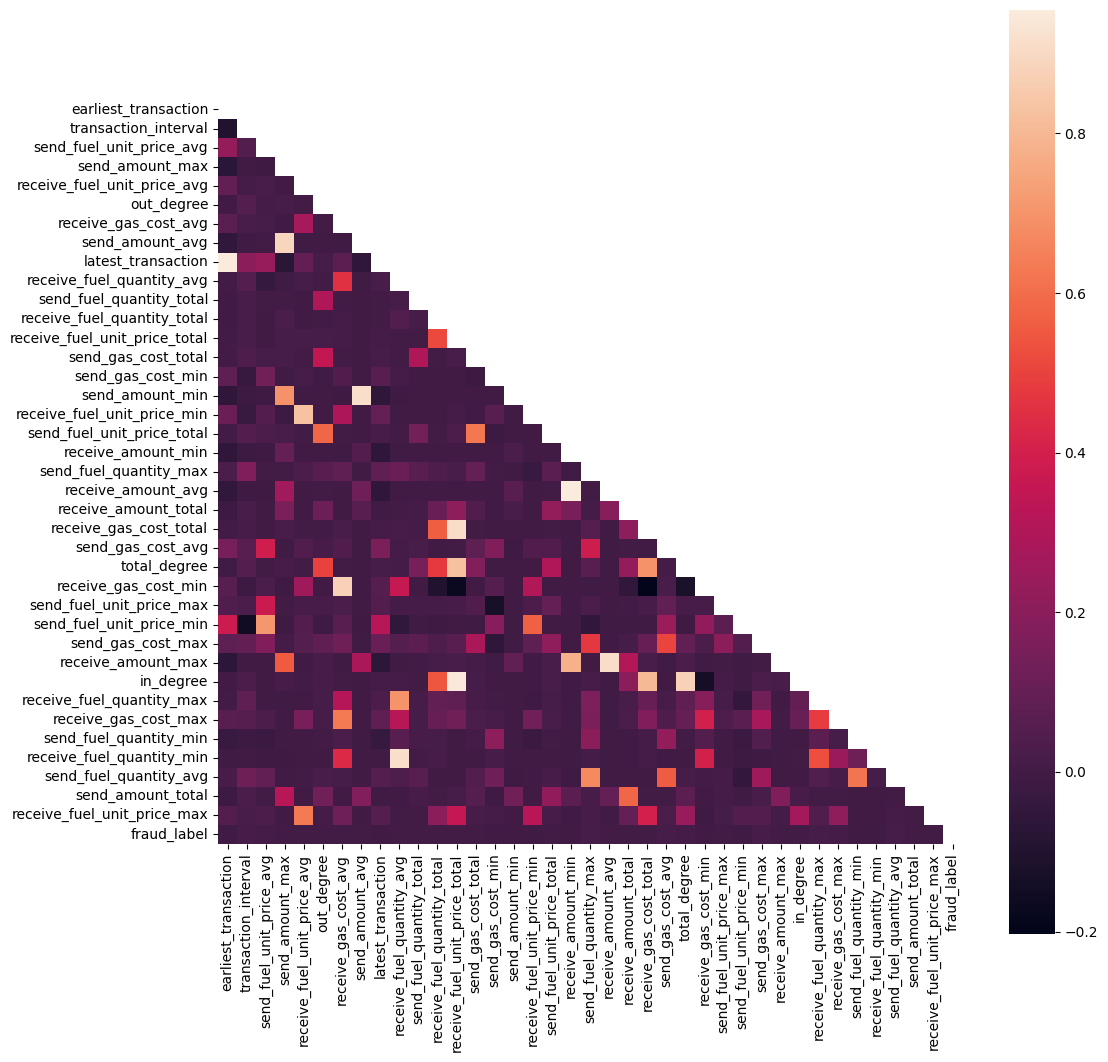

In [ ]:
corr = df[num_feature_list + ['fraud_label']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(data=corr, mask=mask, square=True)
plt.show()

In [ ]:
df[num_feature_list + ['fraud_label']].corr()[['fraud_label']]

,fraud_label
earliest_transaction,-0.008463
transaction_interval,0.016506
send_fuel_unit_price_avg,0.008685
send_amount_max,0.004508
receive_fuel_unit_price_avg,0.001692
out_degree,0.005004
receive_gas_cost_avg,0.000740
send_amount_avg,0.001193
latest_transaction,-0.003388
receive_fuel_quantity_avg,0.002485


In [ ]:
pairs = df[num_feature_list].corr().stack()
pairs_list = list(pairs[pairs.abs().gt(0.9) & pairs.abs().lt(1.0)].index)
print(int(len(pairs_list) / 2))

7


In [ ]:
uniq_pairs_list = []

for x, y in pairs_list:
    if (x, y) in uniq_pairs_list or (y, x) in uniq_pairs_list:
        continue
    else:
        uniq_pairs_list.append((x, y))

In [ ]:
filter_cor_feature_list =  list({x[0] for x in uniq_pairs_list})
filter_cor_feature_list

['earliest_transaction',
 'receive_amount_min',
 'send_amount_avg',
 'receive_fuel_quantity_avg',
 'receive_amount_avg',
 'receive_fuel_unit_price_total']

In [ ]:
len(list(set(num_feature_list) - set(filter_cor_feature_list)))

32

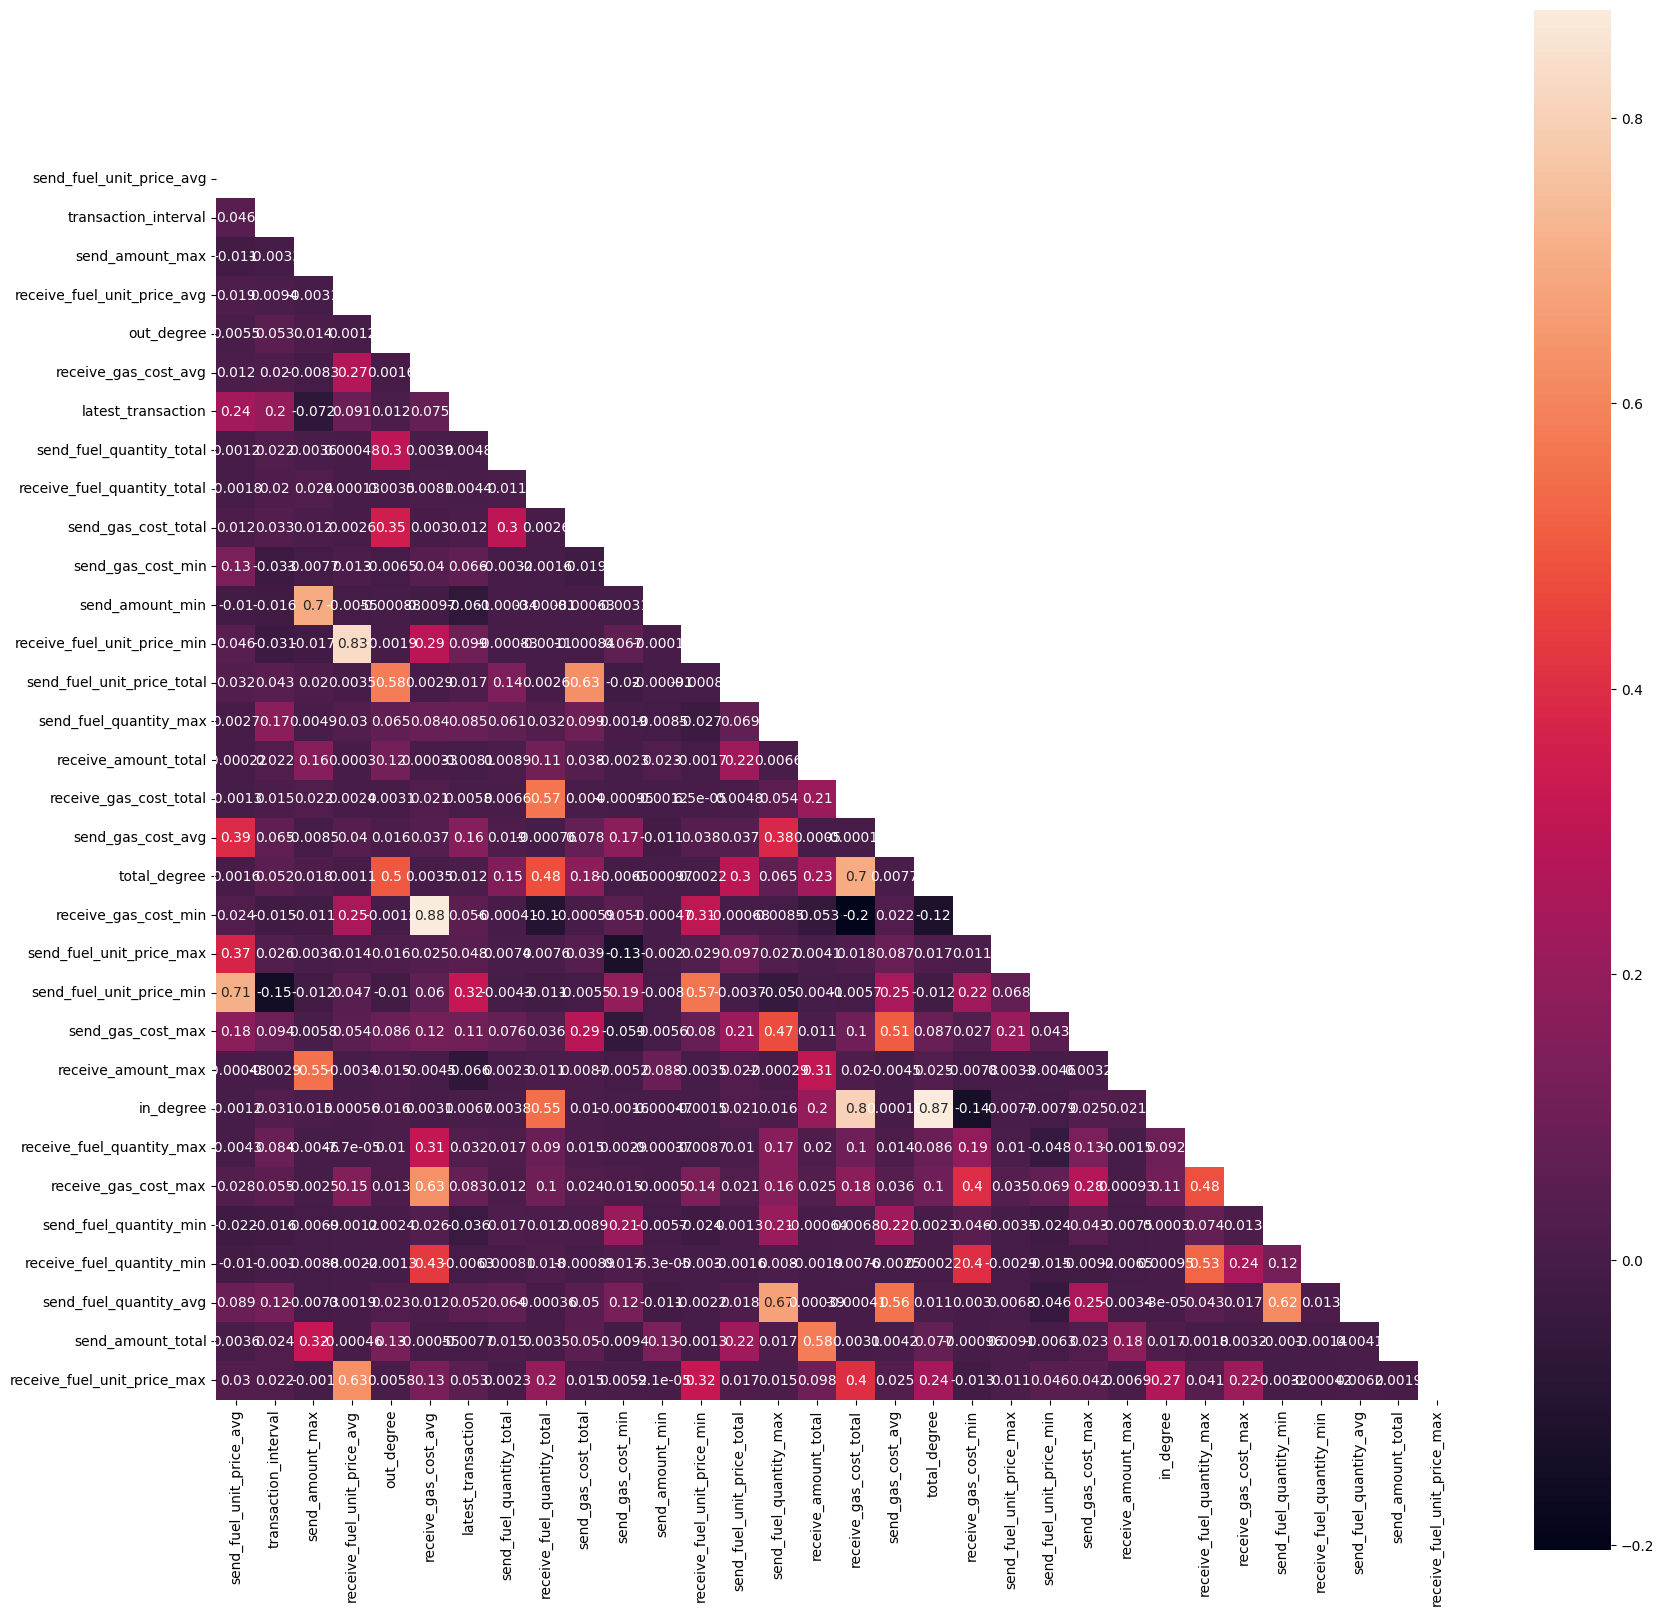

In [ ]:
corr = df[list(set(num_feature_list) - set(filter_cor_feature_list))].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20, 20))
sns.heatmap(data=corr, mask=mask, square=True, annot=True)
plt.show()

In [ ]:
for feature in cat_feature_list:
    df.loc[df[feature].isin([' ', '0']), feature] = 'None'

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)



Target:  0.0014256678386642863


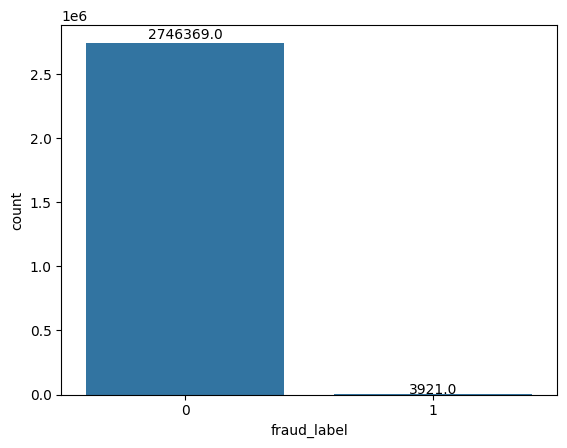

In [ ]:
p = sns.countplot(data=df, x='fraud_label')
show_values(p)
print('Target: ', df['fraud_label'].mean())

In [ ]:
df.isnull().sum()

account_id                       0
fraud_label                      0
send_amount_max                  0
send_amount_min                  0
send_amount_total                0
send_amount_avg                  0
receive_amount_max               0
receive_amount_min               0
receive_amount_total             0
receive_amount_avg               0
send_fuel_quantity_max           0
send_fuel_quantity_min           0
send_fuel_quantity_total         0
send_fuel_quantity_avg           0
receive_fuel_quantity_max        0
receive_fuel_quantity_min        0
receive_fuel_quantity_total      0
receive_fuel_quantity_avg        0
send_fuel_unit_price_max         0
send_fuel_unit_price_min         0
send_fuel_unit_price_total       0
send_fuel_unit_price_avg         0
receive_fuel_unit_price_max      0
receive_fuel_unit_price_min      0
receive_fuel_unit_price_total    0
receive_fuel_unit_price_avg      0
send_gas_cost_max                0
send_gas_cost_min                0
send_gas_cost_total 

In [ ]:
df.shape

(2750290, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750290 entries, 0 to 2750289
Data columns (total 40 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   account_id                     object 
 1   fraud_label                    int64  
 2   send_amount_max                float64
 3   send_amount_min                float64
 4   send_amount_total              float64
 5   send_amount_avg                float64
 6   receive_amount_max             float64
 7   receive_amount_min             float64
 8   receive_amount_total           float64
 9   receive_amount_avg             float64
 10  send_fuel_quantity_max         float64
 11  send_fuel_quantity_min         float64
 12  send_fuel_quantity_total       int64  
 13  send_fuel_quantity_avg         float64
 14  receive_fuel_quantity_max      float64
 15  receive_fuel_quantity_min      float64
 16  receive_fuel_quantity_total    int64  
 17  receive_fuel_quantity_avg      float64
 18  se

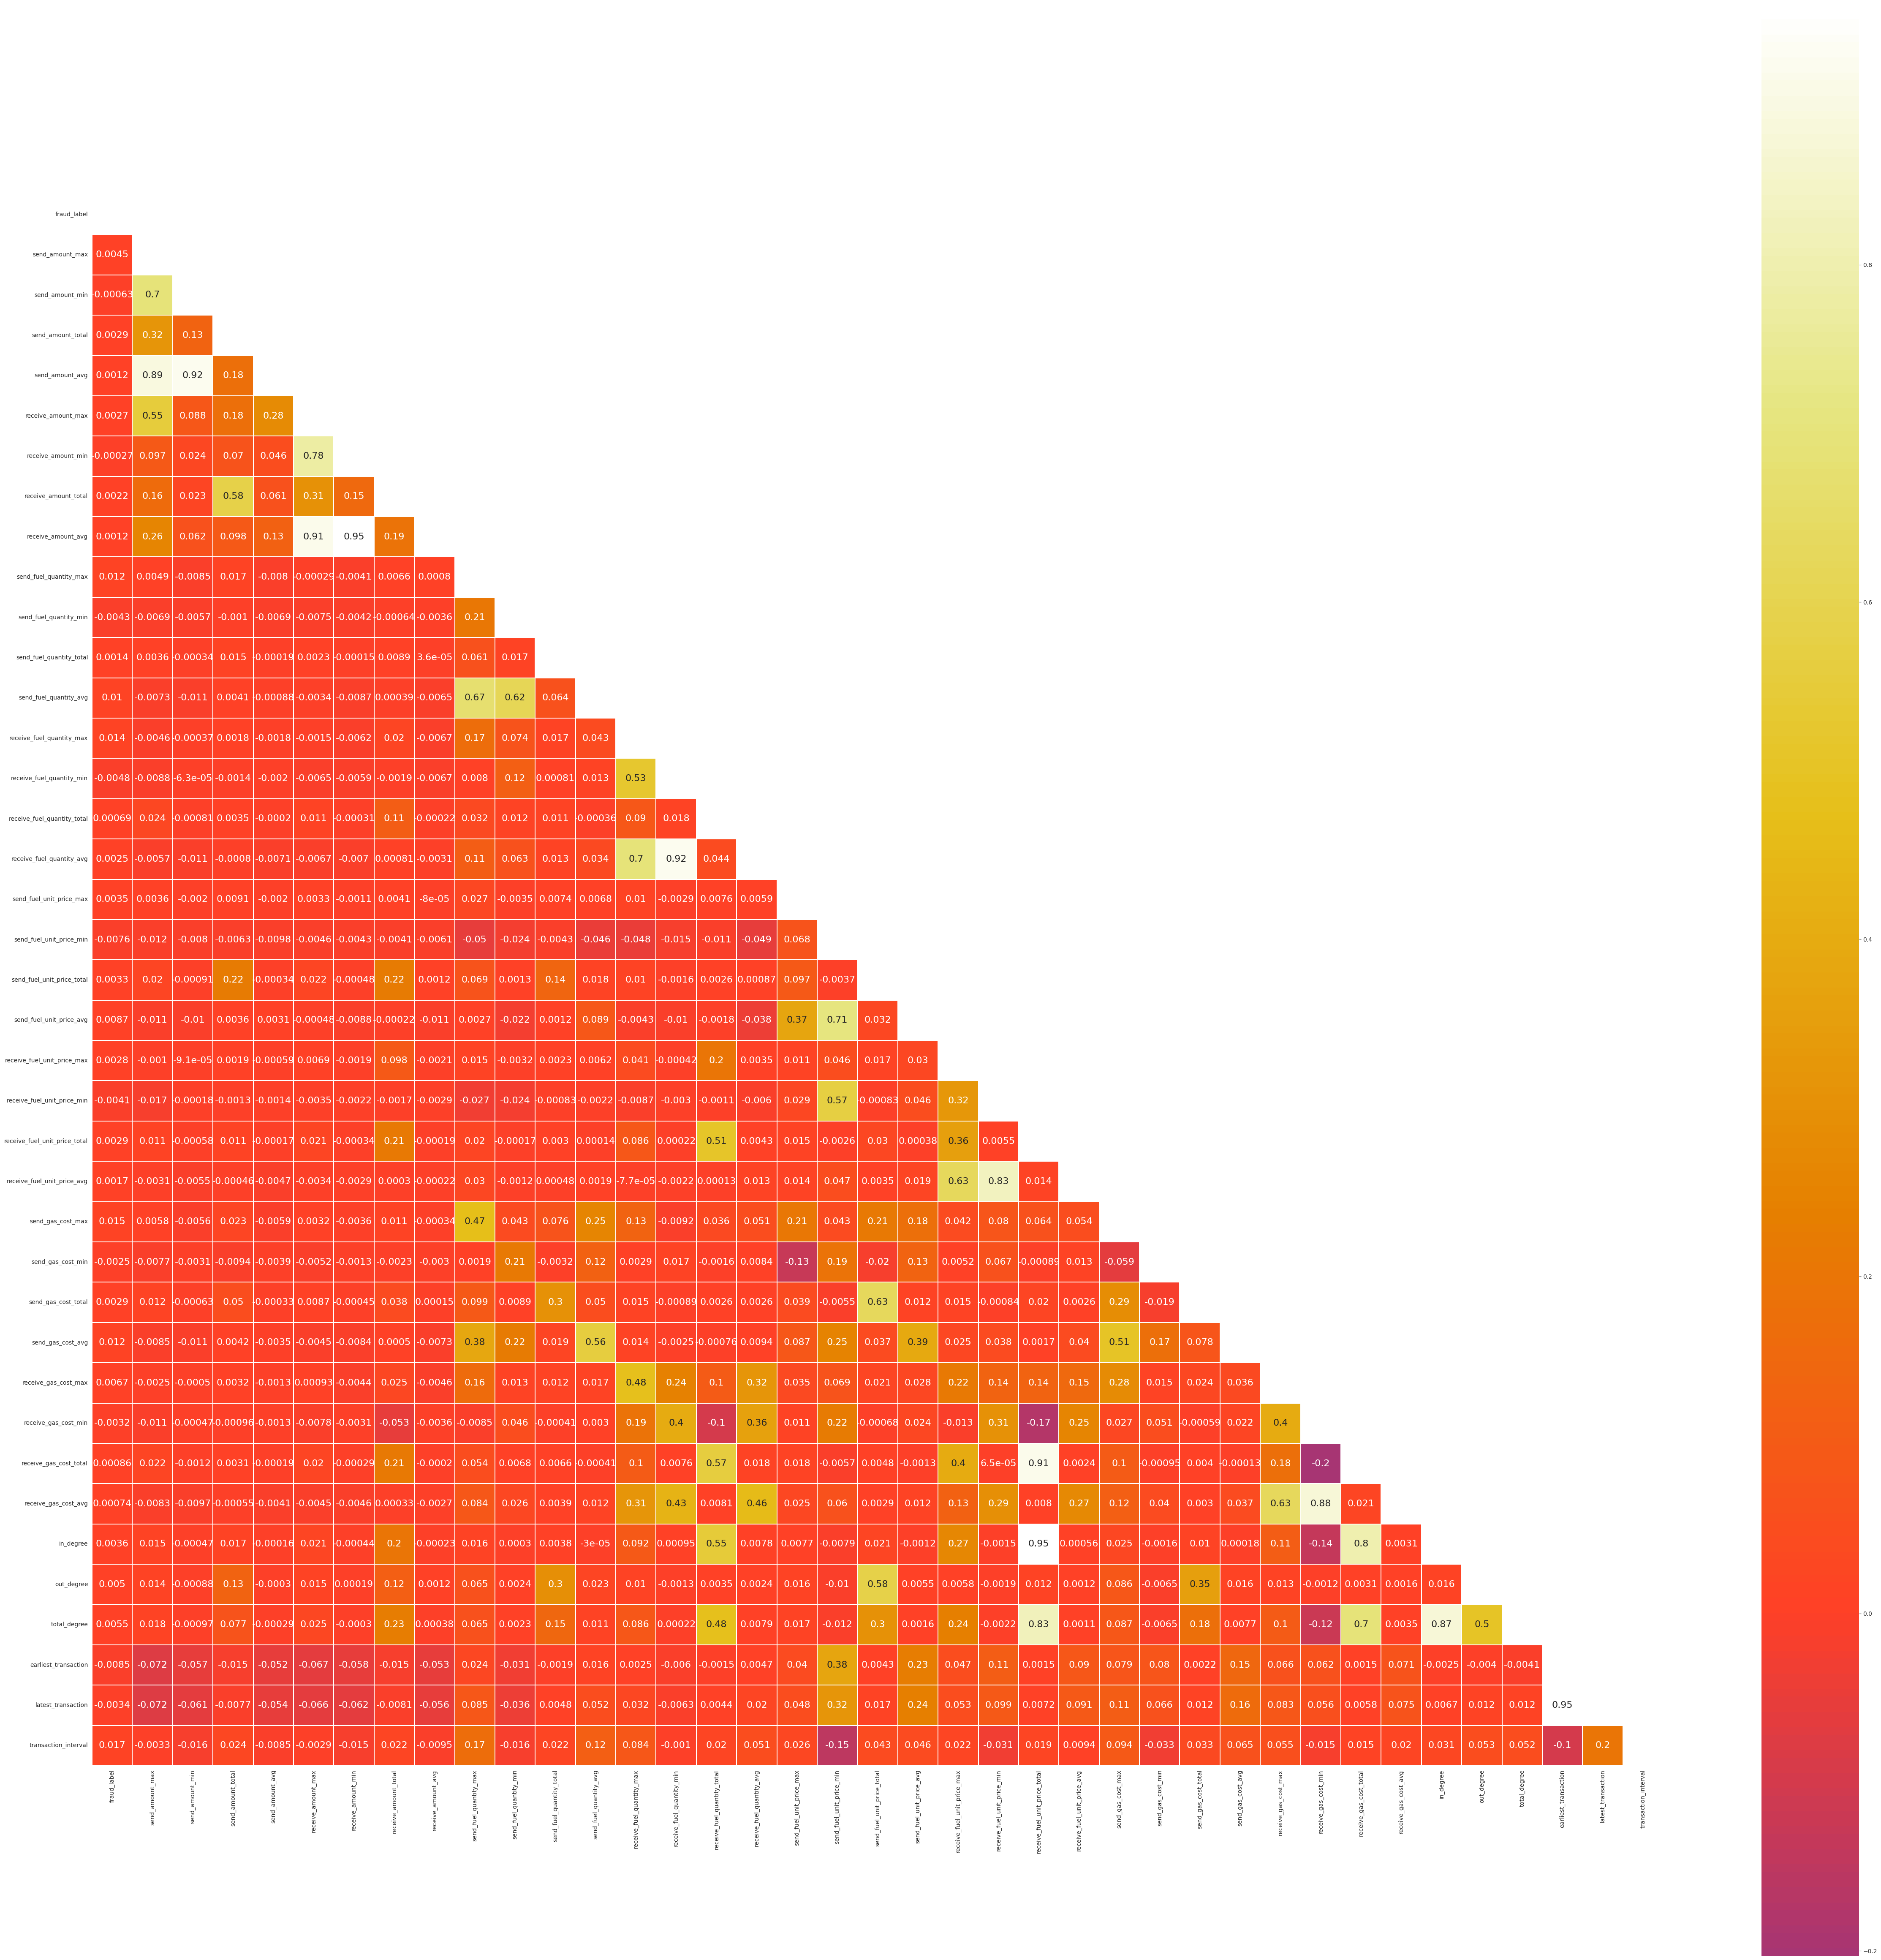

In [ ]:
df = df.drop(columns=['account_id'])
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [ ]:
soretd_corr=corr.sort_values(by=['fraud_label'],key=abs)

In [ ]:
soretd_corr

,fraud_label,send_amount_max,send_amount_min,send_amount_total,send_amount_avg,receive_amount_max,receive_amount_min,receive_amount_total,receive_amount_avg,send_fuel_quantity_max,...,receive_gas_cost_max,receive_gas_cost_min,receive_gas_cost_total,receive_gas_cost_avg,in_degree,out_degree,total_degree,earliest_transaction,latest_transaction,transaction_interval
receive_amount_min,-0.000265,0.097059,0.023664,0.070032,0.045821,0.779807,1.000000,0.153732,0.954550,-0.004133,...,-0.004351,-0.003065,-0.000290,-0.004638,-0.000440,0.000190,-0.000300,-0.057710,-0.061988,-0.015296
send_amount_min,-0.000628,0.695316,1.000000,0.132433,0.917002,0.088113,0.023664,0.022539,0.062138,-0.008530,...,-0.000504,-0.000470,-0.001173,-0.009655,-0.000474,-0.000881,-0.000970,-0.056687,-0.061406,-0.015803
receive_fuel_quantity_total,0.000687,0.024146,-0.000808,0.003485,-0.000199,0.010673,-0.000313,0.112500,-0.000223,0.032475,...,0.100124,-0.101238,0.565545,0.008120,0.547532,0.003503,0.476507,-0.001543,0.004389,0.019716
receive_gas_cost_avg,0.000740,-0.008341,-0.009655,-0.000547,-0.004095,-0.004515,-0.004638,0.000334,-0.002664,0.083669,...,0.631362,0.875968,0.020559,1.000000,0.003116,0.001575,0.003466,0.070577,0.075482,0.019942
receive_gas_cost_total,0.000860,0.021704,-0.001173,0.003108,-0.000191,0.019551,-0.000290,0.212967,-0.000200,0.054432,...,0.176691,-0.202984,1.000000,0.020559,0.800821,0.003091,0.695954,0.001460,0.005813,0.014600
send_amount_avg,0.001193,0.890538,0.917002,0.180722,1.000000,0.283293,0.045821,0.061217,0.125381,-0.007971,...,-0.001325,-0.001268,-0.000191,-0.004095,-0.000163,-0.000302,-0.000287,-0.052266,-0.054027,-0.008523
receive_amount_avg,0.001246,0.260026,0.062138,0.097940,0.125381,0.910972,0.954550,0.192959,1.000000,0.000796,...,-0.004646,-0.003608,-0.000200,-0.002664,-0.000225,0.001184,0.000379,-0.053487,-0.055525,-0.009505
send_fuel_quantity_total,0.001362,0.003584,-0.000337,0.015453,-0.000190,0.002338,-0.000154,0.008880,0.000036,0.060773,...,0.012165,-0.000413,0.006556,0.003914,0.003781,0.296793,0.147122,-0.001851,0.004819,0.022166
receive_fuel_unit_price_avg,0.001692,-0.003051,-0.005455,-0.000461,-0.004677,-0.003359,-0.002922,0.000301,-0.000223,0.030375,...,0.153226,0.254218,0.002352,0.272264,0.000564,0.001166,0.001055,0.089676,0.091124,0.009370
receive_amount_total,0.002205,0.159671,0.022539,0.583181,0.061217,0.305533,0.153732,1.000000,0.192959,0.006640,...,0.024984,-0.053361,0.212967,0.000334,0.199711,0.116356,0.229578,-0.014859,-0.008116,0.021749


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750290 entries, 0 to 2750289
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   fraud_label                    int64  
 1   send_amount_max                float64
 2   send_amount_min                float64
 3   send_amount_total              float64
 4   send_amount_avg                float64
 5   receive_amount_max             float64
 6   receive_amount_min             float64
 7   receive_amount_total           float64
 8   receive_amount_avg             float64
 9   send_fuel_quantity_max         float64
 10  send_fuel_quantity_min         float64
 11  send_fuel_quantity_total       int64  
 12  send_fuel_quantity_avg         float64
 13  receive_fuel_quantity_max      float64
 14  receive_fuel_quantity_min      float64
 15  receive_fuel_quantity_total    int64  
 16  receive_fuel_quantity_avg      float64
 17  send_fuel_unit_price_max       float64
 18  se

In [ ]:
df[df['fraud_label'] == 0]

,fraud_label,send_amount_max,send_amount_min,send_amount_total,send_amount_avg,receive_amount_max,receive_amount_min,receive_amount_total,receive_amount_avg,send_fuel_quantity_max,...,receive_gas_cost_max,receive_gas_cost_min,receive_gas_cost_total,receive_gas_cost_avg,in_degree,out_degree,total_degree,earliest_transaction,latest_transaction,transaction_interval
1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+18,5.000000e+18,5.000000e+18,5.000000e+18,0.0,...,6.510000e+14,6.510000e+14,6.510000e+14,6.510000e+14,1,0,1,1498261945,1498261945,0
2,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.989000e+18,5.989000e+18,5.989000e+18,5.989000e+18,0.0,...,6.510000e+14,6.510000e+14,6.510000e+14,6.510000e+14,1,0,1,1498307928,1498307928,0
4,0,3.300000e+18,3.300000e+18,3.300000e+18,3.300000e+18,5.000000e+16,1.000000e+16,6.000000e+16,3.000000e+16,250000.0,...,4.410000e+14,4.410000e+14,8.820000e+14,4.410000e+14,2,1,3,1498341911,1498404636,62725
5,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.003553e+18,0.000000e+00,1.217252e+19,2.173665e+17,0.0,...,1.200000e+16,2.500000e+14,1.699966e+17,3.035653e+15,56,0,56,1498286656,1516557115,18270459
7,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.335000e+20,1.607980e+18,9.670094e+20,5.089523e+19,0.0,...,4.410000e+14,4.200200e+14,8.337040e+15,4.387916e+14,19,0,19,1498348716,1503632426,5283710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750285,0,1.004700e+18,1.004700e+18,1.004700e+18,1.004700e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,1646090270,1646090270,0
2750286,0,1.084404e+17,1.084404e+17,1.084404e+17,1.084404e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,1646090325,1646090325,0
2750287,0,2.000000e+17,2.000000e+17,2.000000e+17,2.000000e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,1646090705,1646090705,0
2750288,0,3.200000e+16,3.200000e+16,3.200000e+16,3.200000e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,1646090962,1646090962,0


In [ ]:
df.shape

(2750290, 39)

In [ ]:
df = df.replace([float('inf'), float('-inf')], 0.0)

In [ ]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(2750290, 38) (2750290,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2200232, 38) (2200232,)
(550058, 38) (550058,)


In [ ]:
X_train

,send_amount_max,send_amount_min,send_amount_total,send_amount_avg,receive_amount_max,receive_amount_min,receive_amount_total,receive_amount_avg,send_fuel_quantity_max,send_fuel_quantity_min,...,receive_gas_cost_max,receive_gas_cost_min,receive_gas_cost_total,receive_gas_cost_avg,in_degree,out_degree,total_degree,earliest_transaction,latest_transaction,transaction_interval
1328155,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+15,2.900000e+15,5.800000e+15,2.900000e+15,100000.0,100000.0,...,6.720000e+14,5.670000e+14,1.239000e+15,6.195000e+14,2,4,6,1603081194,1604120324,1039130
2601516,6.300000e+15,2.170140e+15,2.191729e+16,3.652882e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21000.0,21000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,6,6,1615196124,1615250527,54403
29960,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,1.860214e+16,4.823370e+14,8.370470e+17,6.696376e+15,125,0,125,1611456797,1642977033,31520236
480585,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.358424e+16,7.358424e+16,7.358424e+16,7.358424e+16,0.0,0.0,...,4.200000e+14,4.200000e+14,4.200000e+14,4.200000e+14,1,0,1,1518602497,1518602497,0
1109387,2.936314e+16,0.000000e+00,2.467225e+17,2.056020e+15,3.052969e+16,4.988000e+14,5.475469e+17,6.441729e+15,100000.0,21000.0,...,9.917870e+15,1.866375e+14,1.747379e+17,2.055740e+15,85,120,205,1586354665,1638443652,52088987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954914,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.155055e+17,4.155055e+17,4.155055e+17,4.155055e+17,0.0,0.0,...,1.722000e+15,1.722000e+15,1.722000e+15,1.722000e+15,1,0,1,1641103530,1641103530,0
1241052,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.579500e+15,1.579500e+15,1.579500e+15,1.579500e+15,0.0,0.0,...,7.371000e+14,7.371000e+14,7.371000e+14,7.371000e+14,1,0,1,1596325669,1596325669,0
28030,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.996661e+18,4.998320e+18,1.499498e+19,7.497490e+18,0.0,0.0,...,1.680000e+15,1.680000e+15,3.360000e+15,1.680000e+15,2,0,2,1605568438,1605568968,530
277869,5.435429e+19,1.029328e+18,1.009980e+20,3.366599e+19,5.461845e+19,4.638155e+19,1.010000e+20,5.050000e+19,90000.0,21000.0,...,6.722100e+14,6.722100e+14,1.344420e+15,6.722100e+14,2,3,5,1513196487,1513197182,695


In [ ]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

In [ ]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

,send_amount_max,send_amount_min,send_amount_total,send_amount_avg,receive_amount_max,receive_amount_min,receive_amount_total,receive_amount_avg,send_fuel_quantity_max,send_fuel_quantity_min,...,receive_gas_cost_max,receive_gas_cost_min,receive_gas_cost_total,receive_gas_cost_avg,in_degree,out_degree,total_degree,earliest_transaction,latest_transaction,transaction_interval
0,-0.044179,-0.031562,-0.013778,-0.039553,-0.045391,-0.037300,-0.013603,-0.043384,0.154748,1.248329,...,-0.073419,-0.055127,-0.004592,-0.077736,-0.004669,-0.000913,-0.004504,0.655813,0.577182,-0.229520
1,-0.044162,-0.031554,-0.013767,-0.039540,-0.045398,-0.037310,-0.013606,-0.043394,-0.110790,0.036947,...,-0.090522,-0.086025,-0.004759,-0.109837,-0.008722,0.006482,-0.004504,0.925982,0.821608,-0.301834
2,-0.044179,-0.031562,-0.013778,-0.039553,-0.045398,-0.037310,-0.013606,-0.043394,-0.181375,-0.285065,...,0.382929,-0.059741,0.107957,0.237154,0.244612,-0.015703,0.205667,0.842593,1.430500,2.008886
3,-0.044179,-0.031562,-0.013778,-0.039553,-0.045200,-0.037060,-0.013569,-0.043156,-0.181375,-0.285065,...,-0.079833,-0.063138,-0.004703,-0.088073,-0.006695,-0.015703,-0.013335,-1.228105,-1.300845,-0.305829
4,-0.044098,-0.031562,-0.013655,-0.039545,-0.045316,-0.037308,-0.013334,-0.043373,0.154748,0.036947,...,0.161902,-0.075855,0.018771,-0.003313,0.163545,0.427998,0.346959,0.282803,1.330944,3.519370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200227,-0.044179,-0.031562,-0.013778,-0.039553,-0.044278,-0.035901,-0.013399,-0.042050,-0.181375,-0.285065,...,-0.046695,0.007814,-0.004527,-0.020607,-0.006695,-0.015703,-0.013335,1.503730,1.389357,-0.305829
2200228,-0.044179,-0.031562,-0.013778,-0.039553,-0.045394,-0.037304,-0.013605,-0.043388,-0.181375,-0.285065,...,-0.071762,-0.045857,-0.004660,-0.071642,-0.006695,-0.015703,-0.013335,0.505161,0.406006,-0.305829
2200229,-0.044179,-0.031562,-0.013778,-0.039553,-0.018433,-0.020364,-0.006161,-0.019145,-0.181375,-0.285065,...,-0.047764,0.005526,-0.004307,-0.022783,-0.004669,-0.015703,-0.011569,0.711280,0.608995,-0.305790
2200230,0.104971,-0.027637,0.036834,0.079723,0.101930,0.119935,0.036538,0.119938,0.121135,0.036947,...,-0.073413,-0.049393,-0.004578,-0.075004,-0.004669,-0.004610,-0.006271,-1.348662,-1.419549,-0.305778


In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training before SMOTE: ((1690474, 13), (1690474,))


In [ ]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training after SMOTE: ((3379258, 13), (3379258,))


In [ ]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 1689629 
 	Fauds: 845
AFTER OVERSAMPLING 
 	Non-frauds: 1689629 
 	Fauds: 1689630


In [ ]:
sc_test = sc.transform(X_test)
print(y_test.shape)
y_test.value_counts()

(550058,)


fraud_label
0    549296
1       762
Name: count, dtype: int64

In [ ]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(sc_train, y_train)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    422393
           1       0.06      0.62      0.10       226

    accuracy                           0.99    422619
   macro avg       0.53      0.81      0.55    422619
weighted avg       1.00      0.99      1.00    422619

[[420060   2333]
 [    85    141]]
